In [32]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('datasets\plant_growth_data.csv')
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [34]:
df.shape

(193, 7)

In [35]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [37]:
df.isna().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df['Soil_Type'].unique()

array(['loam', 'sandy', 'clay'], dtype=object)

In [40]:
df['Fertilizer_Type'].unique()

array(['chemical', 'organic', 'none'], dtype=object)

In [41]:
df['Water_Frequency'].unique()

array(['bi-weekly', 'weekly', 'daily'], dtype=object)

In [42]:
df.dtypes

Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object

In [43]:
cols=df.dtypes[df.dtypes=='object'].index

df_dummy=pd.get_dummies(df[cols],drop_first=True,dtype=int)


In [44]:
df.drop(cols,axis=1,inplace=True)
df=pd.concat([df,df_dummy],axis=1)

In [45]:
df

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,1,0,0,0,0,0
1,4.033133,28.919484,52.422276,1,0,1,0,1,0,1
2,8.892769,23.179059,44.660539,0,1,0,0,0,1,0
3,8.241144,18.465886,46.433227,0,1,0,0,0,1,0
4,8.374043,18.128741,63.625923,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,0,1,1,0,1,0
189,7.528000,30.500000,60.100000,1,0,0,0,1,0,0
190,4.934000,24.500000,61.700000,0,1,0,0,0,1,0
191,8.273000,27.900000,69.500000,1,0,1,1,0,0,1


In [46]:
df.dtypes

Sunlight_Hours             float64
Temperature                float64
Humidity                   float64
Growth_Milestone             int64
Soil_Type_loam               int32
Soil_Type_sandy              int32
Water_Frequency_daily        int32
Water_Frequency_weekly       int32
Fertilizer_Type_none         int32
Fertilizer_Type_organic      int32
dtype: object

<Axes: >

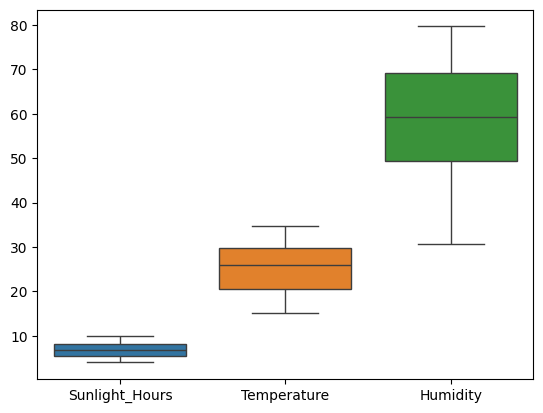

In [47]:
cols=['Sunlight_Hours','Temperature','Humidity']
sns.boxplot(df[cols])

#Insights no outliers 

In [48]:
x=df.drop('Growth_Milestone',axis=1)
y=df['Growth_Milestone']
x

,Sunlight_Hours,Temperature,Humidity,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,1,0,0,0,0,0
1,4.033133,28.919484,52.422276,0,1,0,1,0,1
2,8.892769,23.179059,44.660539,1,0,0,0,1,0
3,8.241144,18.465886,46.433227,1,0,0,0,1,0
4,8.374043,18.128741,63.625923,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,1,1,0,1,0
189,7.528000,30.500000,60.100000,0,0,0,1,0,0
190,4.934000,24.500000,61.700000,1,0,0,0,1,0
191,8.273000,27.900000,69.500000,0,1,1,0,0,1


In [49]:
y

0      0
1      1
2      0
3      0
4      0
      ..
188    0
189    1
190    0
191    1
192    0
Name: Growth_Milestone, Length: 193, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [53]:
x_train.shape,x_test.shape

((129, 3), (64, 3))

In [54]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.59375

In [56]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,0.2,1,2,3,10,50,100],'gamma':[1,0.1,0.2,0.001,0.003],'kernel':['linear']}

grid_seach=GridSearchCV(svc,param_grid=param_grid,cv=5,verbose=3)
grid_seach.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.538 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.808 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.538 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.520 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.538 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.808 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.538 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.520 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.2, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.2, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [57]:
grid_seach.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [58]:
grid_seach.best_score_

0.6507692307692308

In [59]:
best_model=grid_seach.best_estimator_
best_model

SVC(C=1, gamma=1, kernel='linear')

In [60]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [61]:
accuracy_score(y_test,y_pred_tuned)

0.625

In [62]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62        29
           1       0.69      0.57      0.62        35

    accuracy                           0.62        64
   macro avg       0.63      0.63      0.62        64
weighted avg       0.64      0.62      0.62        64

